In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heart_study = pd.read_csv("Resources/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv",dtype={"Year": "str"})

In [3]:
heart_study.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [4]:
heart_study.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [5]:
# Dropping columns our group determined is insignificant to our analysis
heart_study.drop(["GeographicLevel",
                  "DataSource",
                  "Class",
                  "Data_Value_Unit",
                  "Data_Value_Type",
                  "Data_Value_Footnote_Symbol",
                  "Data_Value_Footnote",
                  "StratificationCategory1",
                  "StratificationCategory2",
                  "StratificationCategory3",
                  "LocationID"], axis = 1, inplace = True)

# Renaming columns accordingly
heart_study.rename(columns={
    "LocationAbbr": "State",
    "LocationDesc": "County",
    "Stratification1": "Age Group",
    "Stratification2": "Ethnicity",
    "Stratification3": "Sex"
},
    inplace=True)

heart_study.head()

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
0,1999,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [6]:
heart_study.shape

(5770240, 10)

In [7]:
heart_study["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017', '1999 - 2010',
       '2010 - 2019'], dtype=object)

In [8]:
# Dropping rows containing "1999-2010" and "2010-2019"
heart_study_cleaned = heart_study[(heart_study.Year != "1999 - 2010") & (heart_study.Year != "2010 - 2019")]
heart_study_cleaned["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017'], dtype=object)

In [9]:
# Dropping rows that contain missing values
heart_study_cleaned = heart_study_cleaned.dropna(0)

heart_study_cleaned

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
53,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall
79,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men
106,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,465.9,704.8,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,466.8,706.1,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,458.2,719.7,Ages 65 years and older,White,Overall


In [10]:
heart_study_year = heart_study_cleaned.loc[(heart_study_cleaned["Topic"] == "All heart disease") & 
                                           (heart_study_cleaned["Sex"] == "Overall") & 
                                           (heart_study_cleaned["Ethnicity"] == "Overall"), :]
heart_study_year

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
110,2019,AL,Autauga,All heart disease,122.6,106.4,143.4,Ages 35-64 years,Overall,Overall
111,2006,AL,Autauga,All heart disease,164.0,142.5,194.0,Ages 35-64 years,Overall,Overall
112,2003,AL,Autauga,All heart disease,159.6,137.4,189.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5267778,2007,WY,Weston,All heart disease,1045.1,932.3,1187.5,Ages 65 years and older,Overall,Overall
5267779,2010,WY,Weston,All heart disease,987.0,861.6,1098.7,Ages 65 years and older,Overall,Overall
5267780,2006,WY,Weston,All heart disease,1111.5,978.9,1259.0,Ages 65 years and older,Overall,Overall
5267781,2011,WY,Weston,All heart disease,933.5,814.8,1058.7,Ages 65 years and older,Overall,Overall


In [11]:
heart_study_year['Age Group'] = heart_study_year['Age Group'].replace({'Ages 35-64 years': 'Ages 35 years and older',
                                           'Ages 65 years and older': 'Ages 35 years and older'})
heart_study_year

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35 years and older,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35 years and older,Overall,Overall
110,2019,AL,Autauga,All heart disease,122.6,106.4,143.4,Ages 35 years and older,Overall,Overall
111,2006,AL,Autauga,All heart disease,164.0,142.5,194.0,Ages 35 years and older,Overall,Overall
112,2003,AL,Autauga,All heart disease,159.6,137.4,189.5,Ages 35 years and older,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5267778,2007,WY,Weston,All heart disease,1045.1,932.3,1187.5,Ages 35 years and older,Overall,Overall
5267779,2010,WY,Weston,All heart disease,987.0,861.6,1098.7,Ages 35 years and older,Overall,Overall
5267780,2006,WY,Weston,All heart disease,1111.5,978.9,1259.0,Ages 35 years and older,Overall,Overall
5267781,2011,WY,Weston,All heart disease,933.5,814.8,1058.7,Ages 35 years and older,Overall,Overall


In [12]:
heart_study_state = heart_study_year.groupby(['Year','State', 'County', 'Age Group']).sum().reset_index()

heart_study_state

,Year,State,County,Age Group,Data_Value,Confidence_limit_Low,Confidence_limit_High
0,1999,AK,Aleutians East,Ages 35 years and older,38.7,26.5,59.8
1,1999,AK,Aleutians West,Ages 35 years and older,30.1,16.1,54.9
2,1999,AK,Anchorage,Ages 35 years and older,1418.9,1259.9,1597.8
3,1999,AK,Bethel,Ages 35 years and older,1355.6,1139.6,1681.9
4,1999,AK,Denali,Ages 35 years and older,83.3,59.4,120.4
...,...,...,...,...,...,...,...
64606,2019,WY,Sweetwater,Ages 35 years and older,1160.8,1024.2,1326.1
64607,2019,WY,Teton,Ages 35 years and older,759.7,672.0,855.7
64608,2019,WY,Uinta,Ages 35 years and older,1279.9,1112.1,1457.9
64609,2019,WY,Washakie,Ages 35 years and older,1103.2,983.3,1262.5


In [13]:
# create an empty dataframe to store the results
state_year_results = pd.DataFrame(columns=['State', 'Year', 'Mean_Data_Value'])

# group by state and year
grouped_df = heart_study_state.groupby(['State', 'Year'])

# loop through each state-year group
for name, group in grouped_df:
    state = name[0]
    year = name[1]
    county_mean = group.groupby(['County'])['Data_Value'].mean()
    # calculate the mean data value for each county in the state-year group
    state_year_mean = county_mean.mean()
    # add the results to the dataframe
    state_year_results = state_year_results.append({'State': state, 'Year': year, 'Mean_Data_Value': state_year_mean}, ignore_index=True)


state_year_results

,State,Year,Mean_Data_Value
0,AK,1999,1076.709524
1,AK,2000,1164.495238
2,AK,2001,1058.209524
3,AK,2002,948.971429
4,AK,2003,1058.366667
...,...,...,...
1066,WY,2015,1115.413043
1067,WY,2016,1107.908696
1068,WY,2017,1091.300000
1069,WY,2018,1090.778261


In [14]:
nj_study = heart_study_cleaned.loc[(heart_study_cleaned["State"] == "NJ") &
                                   (heart_study_cleaned["Ethnicity"] == "Overall"), :]
nj_study

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
2961036,2000,NJ,Bergen,All stroke,9.4,7.9,11.2,Ages 35-64 years,Overall,Women
2961284,2014,NJ,Bergen,All stroke,5.8,5.0,6.9,Ages 35-64 years,Overall,Women
2961313,2015,NJ,Bergen,All stroke,5.4,4.6,6.4,Ages 35-64 years,Overall,Women
2961399,2001,NJ,Bergen,All stroke,8.4,7.2,10.2,Ages 35-64 years,Overall,Women
2961507,1999,NJ,Bergen,All stroke,9.1,7.4,11.0,Ages 35-64 years,Overall,Women
...,...,...,...,...,...,...,...,...,...,...
3005097,2009,NJ,Warren,Heart failure,418.8,362.2,475.4,Ages 65 years and older,Overall,Men
3005098,2001,NJ,Warren,Heart failure,529.1,458.8,603.2,Ages 65 years and older,Overall,Men
3005099,2000,NJ,Warren,Heart failure,569.2,487.7,655.4,Ages 65 years and older,Overall,Men
3005100,2006,NJ,Warren,Heart failure,435.4,385.3,498.0,Ages 65 years and older,Overall,Men


In [15]:
nj_study["Topic"].unique()

array(['All stroke', 'Heart failure', 'All heart disease',
       'Coronary heart disease (CHD)', 'Cardiovascular disease (CVD)'],
      dtype=object)

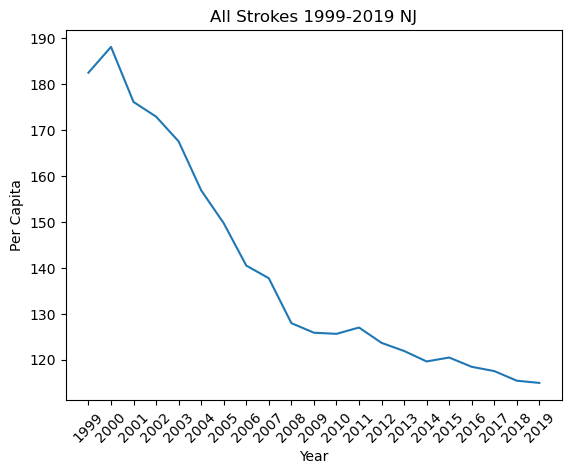

In [16]:
nj_all_stroke = nj_study.loc[nj_study["Topic"] == "All stroke"].groupby("Year").mean()
nj_all_stroke = nj_all_stroke.reset_index()
plt.plot(nj_all_stroke["Year"], nj_all_stroke["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("All Strokes 1999-2019 NJ")
plt.show()

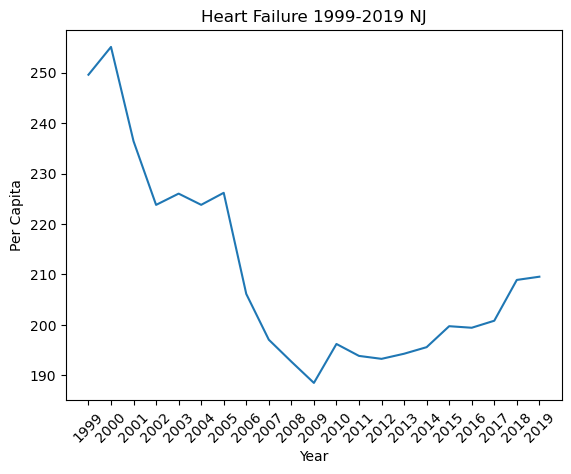

In [17]:
nj_heart_failure = nj_study.loc[nj_study["Topic"] == "Heart failure"].groupby("Year").mean()
nj_heart_failure = nj_heart_failure.reset_index()
plt.plot(nj_heart_failure["Year"], nj_heart_failure["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Failure 1999-2019 NJ")
plt.show()

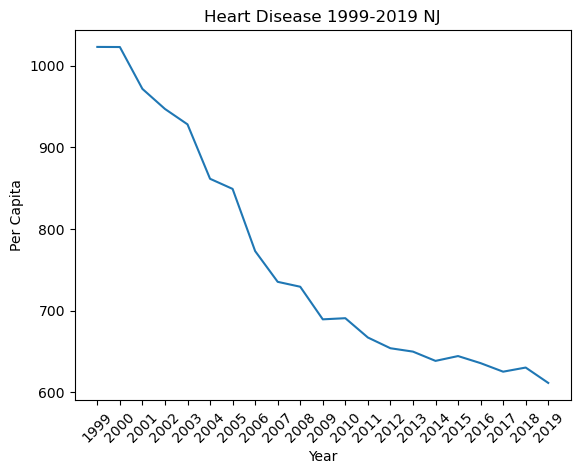

In [18]:
nj_heart_disease = nj_study.loc[nj_study["Topic"] == "All heart disease"].groupby("Year").mean()
nj_heart_disease = nj_heart_disease.reset_index()
plt.plot(nj_heart_disease["Year"], nj_heart_disease["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Disease 1999-2019 NJ")
plt.show()

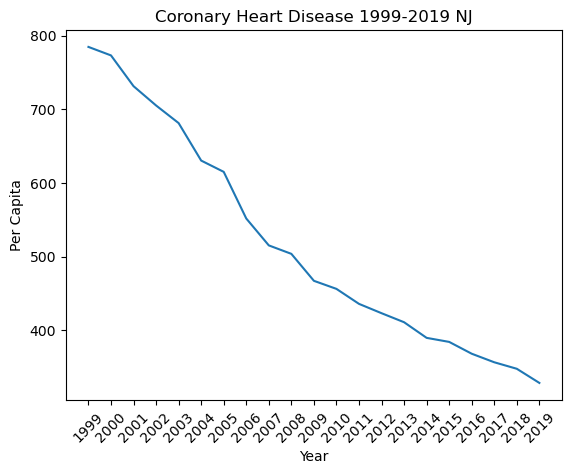

In [19]:
nj_coronary = nj_study.loc[nj_study["Topic"] == "Coronary heart disease (CHD)"].groupby("Year").mean()
nj_coronary = nj_coronary.reset_index()
plt.plot(nj_coronary["Year"], nj_coronary["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Coronary Heart Disease 1999-2019 NJ")
plt.show()

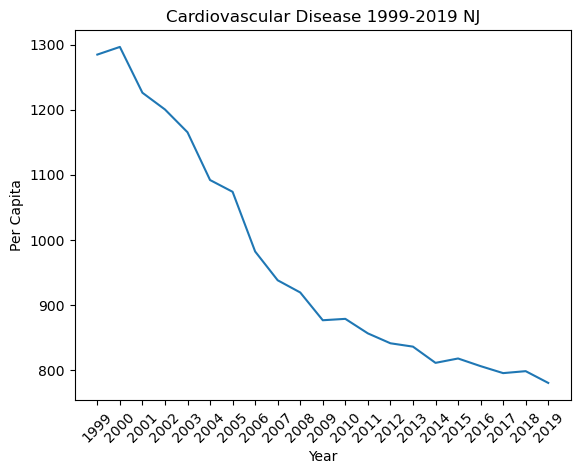

In [20]:
nj_cardiovascular = nj_study.loc[nj_study["Topic"] == "Cardiovascular disease (CVD)"].groupby("Year").mean()
nj_cardiovascular = nj_cardiovascular.reset_index()
plt.plot(nj_cardiovascular["Year"], nj_cardiovascular["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Cardiovascular Disease 1999-2019 NJ")
plt.show()

In [21]:
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county = nj_by_county.unstack()
nj_by_county = nj_by_county.T

nj_by_county

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,,,,,,,,,,,,
Atlantic,741.006667,802.100000,768.306667,750.036667,765.923333,705.653333,674.213333,594.873333,560.886667,544.436667,...,508.210000,506.046667,479.446667,477.140000,484.996667,490.756667,491.760000,482.546667,479.596667,454.843333
Bergen,642.330000,632.936667,588.116667,585.593333,548.466667,503.983333,498.413333,465.166667,435.990000,433.643333,...,403.103333,384.896667,371.636667,376.856667,362.120000,359.180000,352.096667,343.203333,337.813333,339.313333
Burlington,707.880000,711.336667,674.170000,663.763333,650.206667,612.000000,587.923333,515.093333,506.573333,490.583333,...,457.476667,440.973333,415.640000,406.666667,404.443333,429.040000,415.253333,414.183333,423.340000,420.636667
Camden,723.123333,722.950000,680.156667,669.280000,648.490000,596.856667,586.823333,540.233333,517.400000,502.043333,...,490.220000,492.620000,471.653333,472.196667,459.676667,455.316667,444.843333,451.726667,457.883333,443.516667
Cape May,635.543333,708.906667,680.360000,662.626667,670.926667,627.963333,686.823333,614.496667,565.006667,566.450000,...,533.123333,521.083333,516.050000,517.110000,499.003333,504.356667,514.390000,498.106667,491.683333,464.106667
Cumberland,808.433333,818.343333,791.993333,760.766667,768.050000,728.780000,730.710000,615.376667,573.200000,551.053333,...,544.753333,539.556667,536.413333,539.260000,539.226667,545.923333,538.966667,550.246667,529.860000,518.646667
Essex,695.220000,681.863333,658.393333,645.750000,610.356667,581.116667,563.873333,534.903333,514.160000,517.803333,...,493.110000,472.700000,448.253333,448.473333,415.773333,417.693333,407.296667,383.646667,389.800000,366.023333
Gloucester,718.893333,759.710000,719.690000,718.996667,716.363333,656.106667,654.110000,560.983333,516.093333,509.786667,...,482.623333,483.473333,480.370000,482.696667,466.006667,476.356667,482.740000,490.490000,499.556667,486.710000
Hudson,756.180000,715.266667,686.323333,677.306667,655.630000,636.146667,638.406667,586.680000,554.906667,553.556667,...,488.033333,469.126667,444.183333,440.540000,410.063333,391.683333,378.030000,360.030000,347.150000,327.850000


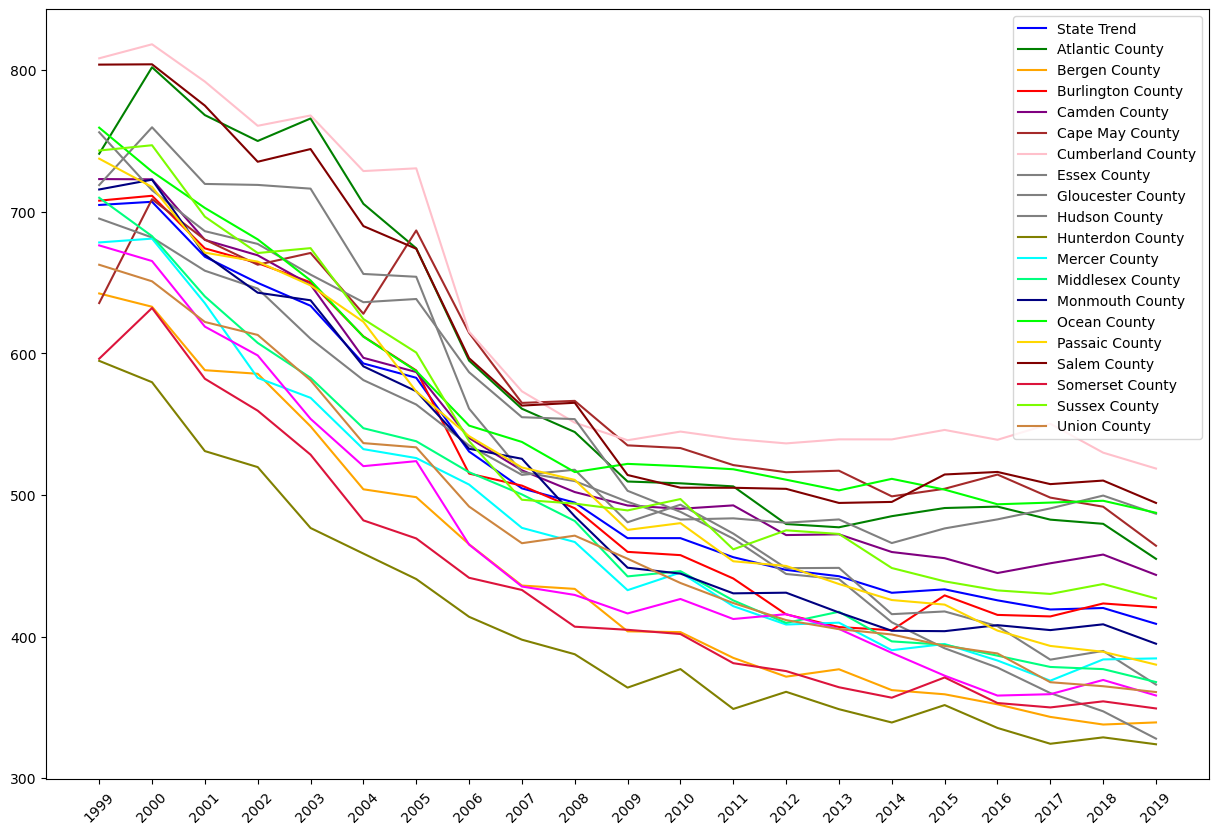

In [22]:
years = nj_by_county.keys()
state_trend = nj_by_county.mean()

plt.figure(figsize=(15,10))
nj_state, = plt.plot(years, state_trend, color="blue", label="State Trend" )

Atlantic, = plt.plot(years, nj_by_county.loc['Atlantic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="green",label="Atlantic County")
Bergen, = plt.plot(years, nj_by_county.loc['Bergen',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="orange",label="Bergen County")
Burlington, = plt.plot(years, nj_by_county.loc['Burlington',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="red",label="Burlington County")

Camden, = plt.plot(years, nj_by_county.loc['Camden',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="purple",label="Camden County")

CapeMay, = plt.plot(years, nj_by_county.loc['Cape May',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="brown",label="Cape May County")
Cumberland, = plt.plot(years, nj_by_county.loc['Cumberland',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="pink",label="Cumberland County")

Essex, = plt.plot(years, nj_by_county.loc['Essex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Essex County")

Gloucester, = plt.plot(years, nj_by_county.loc['Gloucester',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Gloucester County")

Hudson, = plt.plot(years, nj_by_county.loc['Hudson',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Hudson County")

Hunterdon, = plt.plot(years, nj_by_county.loc['Hunterdon',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="olive",label="Hunterdon County")
Mercer, = plt.plot(years, nj_by_county.loc['Mercer',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="cyan",label="Mercer County")
Middlesex, = plt.plot(years, nj_by_county.loc['Middlesex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="springgreen",label="Middlesex County")
Monmouth, = plt.plot(years, nj_by_county.loc['Monmouth',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="navy",label="Monmouth County")
Morris, = plt.plot(years, nj_by_county.loc['Morris',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="fuchsia",label="Morris County")
Ocean, = plt.plot(years, nj_by_county.loc['Ocean',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lime",label="Ocean County")
Passaic, = plt.plot(years, nj_by_county.loc['Passaic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gold",label="Passaic County")
Salem, = plt.plot(years, nj_by_county.loc['Salem',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="maroon",label="Salem County")
Somerset, = plt.plot(years, nj_by_county.loc['Somerset',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="crimson",label="Somerset County")
Sussex, = plt.plot(years, nj_by_county.loc['Sussex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lawngreen",label="Sussex County")
Union, = plt.plot(years, nj_by_county.loc['Union',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="peru",label="Union County")
plt.legend(handles=[nj_state, Atlantic, Bergen, Burlington, Camden, CapeMay, Cumberland, Essex, Gloucester,
                   Hudson,Hunterdon,Mercer,Middlesex,Monmouth,Ocean,Passaic,Salem,Somerset,Sussex,Union], loc="best")


plt.xticks(rotation=45)

plt.show()

In [23]:
chronic_df = pd.read_csv("Resources/U.S._Chronic_Disease_Indicators__CDI_.csv")
chronic_df.head()

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [24]:
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [25]:
# Dropping columns our group determined is insignificant to our analysis
chronic_df.drop(["YearStart",
                 "LocationDesc",
                 "DataSource",
                 "Response",
                 "DataValueFootnoteSymbol",
                 "DatavalueFootnote",
                 "Stratification1",
                 "StratificationCategory2",
                 "Stratification2",
                 "StratificationCategory3",
                 "Stratification3",
                 "ResponseID",
                 "LocationID",
                 "TopicID",
                 "QuestionID",
                 "DataValueTypeID",
                 "StratificationCategoryID1",
                 "StratificationID1",
                 "StratificationCategoryID2",
                 "StratificationID2",
                 "StratificationCategoryID3",
                 "StratificationID3"], axis = 1, inplace = True)

# Renaming columns accordingly
chronic_df.rename(columns={
    "YearEnd": "Year",
    "LocationAbbr": "State",
    "StratificationCategory1": "Ethnicity-Sex"
},
    inplace=True)

chronic_df.head()

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045)
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464)
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192)
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048)
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005)


In [26]:
#Adding in the groups for the regions by state and creating a for loop to add them to the dataframe
regions = {
    'Northeast': ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'South': ['DE', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK'],
    'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# create a new column in your dataframe called 'State Region'
chronic_df['Region'] = ''

# loop through each state in your dataframe and assign its region to the new column
for state in chronic_df['State'].unique():
    for region, states in regions.items():
        if state in states:
            chronic_df.loc[chronic_df['State'] == state, 'Region'] = region
            break
            
chronic_df

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation,Region
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045),South
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464),West
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192),
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048),South
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005),Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,WY,Diabetes,Dilated eye examination among adults aged >= 1...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West
1185672,2020,WY,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,41.5,38.5,44.6,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West
1185673,2017,IA,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-93.81649055599968 42.46940091300047),Midwest
1185674,2020,WY,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West


In [27]:
smoking_df = chronic_df.loc[(chronic_df["Topic"] == "Tobacco") &
                            (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
smoking_df = smoking_df.groupby(["Year", "State","Region"]).mean().reset_index()

smoking_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,22.9,21.0,25.0
1,2011,AL,South,24.3,22.9,25.8
2,2011,AR,South,27.0,24.8,29.2
3,2011,AZ,West,19.3,17.3,21.4
4,2011,CA,West,13.7,12.9,14.4
...,...,...,...,...,...,...
600,2021,VT,Northeast,14.8,13.5,16.2
601,2021,WA,West,10.7,10.0,11.5
602,2021,WI,Midwest,13.3,12.0,14.7
603,2021,WV,South,22.0,20.7,23.3


In [28]:
diabetes_df = chronic_df.loc[(chronic_df["Topic"] == "Diabetes") &
                            (chronic_df["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
diabetes_df = diabetes_df.groupby(["Year", "State","Region"]).mean().reset_index()

diabetes_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,7.9,6.6,9.4
1,2011,AL,South,11.8,10.9,12.7
2,2011,AR,South,11.2,10.1,12.4
3,2011,AZ,West,9.5,8.3,10.8
4,2011,CA,West,8.9,8.4,9.5
...,...,...,...,...,...,...
600,2021,VT,Northeast,8.5,7.6,9.5
601,2021,WA,West,8.7,8.2,9.3
602,2021,WI,Midwest,9.1,8.2,10.1
603,2021,WV,South,15.9,14.9,16.9


In [29]:
obesity_df = chronic_df.loc[(chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                            (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
obesity_df = obesity_df.groupby(["Year", "State","Region"]).mean().reset_index()

obesity_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,27.4,25.3,29.7
1,2011,AL,South,32.0,30.5,33.5
2,2011,AR,South,30.9,28.8,33.1
3,2011,AZ,West,25.1,23.0,27.3
4,2011,CA,West,23.8,22.9,24.7
...,...,...,...,...,...,...
600,2021,VT,Northeast,29.0,27.4,30.7
601,2021,WA,West,28.8,27.7,29.9
602,2021,WI,Midwest,33.9,32.1,35.7
603,2021,WV,South,40.6,39.1,42.1


In [30]:
cardio_df = chronic_df.loc[(chronic_df["Topic"] == "Cardiovascular Disease") &
                            (chronic_df["Question"] == "Mortality from coronary heart disease") &
                            (chronic_df["DataValueUnit"] == "cases per 100,000") &
                            (chronic_df["DataValueType"] == "Crude Rate") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
cardio_df = cardio_df.groupby(["Year", "State","Region"]).mean().reset_index()

cardio_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2010,AK,West,54.3,48.9,59.8
1,2010,AL,South,116.3,113.2,119.3
2,2010,AR,South,162.0,157.4,166.7
3,2010,AZ,West,112.5,109.9,115.1
4,2010,CA,West,106.5,105.4,107.5
...,...,...,...,...,...,...
567,2020,VT,Northeast,165.7,155.6,175.8
568,2020,WA,West,90.2,88.1,92.3
569,2020,WI,Midwest,118.6,115.8,121.4
570,2020,WV,South,179.5,173.3,185.7


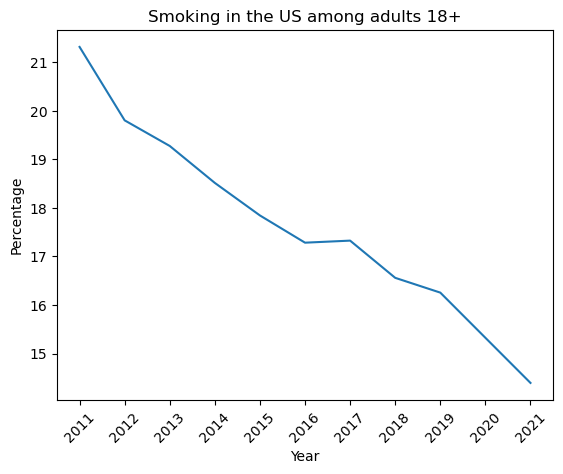

In [31]:
us_smoking = smoking_df.groupby("Year").mean().reset_index()
plt.plot(us_smoking["Year"], us_smoking["DataValueAlt"])
plt.xticks(us_smoking["Year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Smoking in the US among adults 18+")
plt.show()

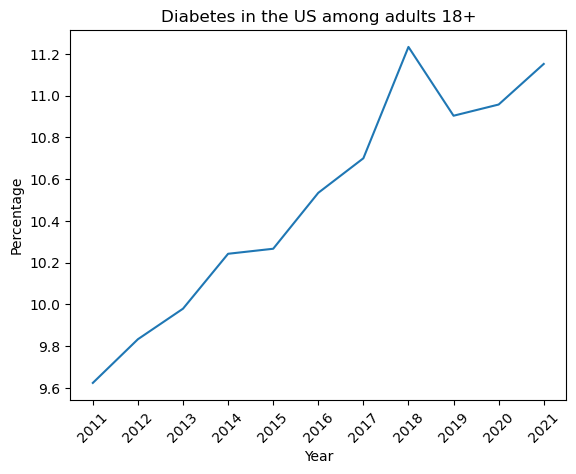

In [32]:
us_diabetes = diabetes_df.groupby("Year").mean().reset_index()
plt.plot(us_diabetes["Year"], us_diabetes["DataValueAlt"])
plt.xticks(us_diabetes["Year"],rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Diabetes in the US among adults 18+")
plt.show()

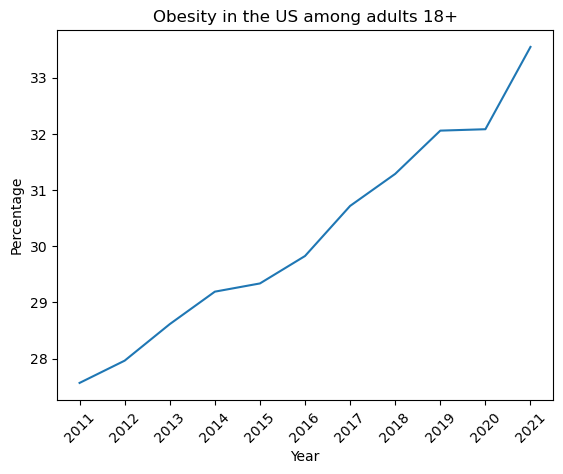

In [33]:
us_obesity = obesity_df.groupby("Year").mean().reset_index()
plt.plot(us_obesity["Year"], us_obesity["DataValueAlt"])
plt.xticks(us_obesity["Year"],rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Obesity in the US among adults 18+")
plt.show()

In [34]:
smoking_region = smoking_df.groupby(["Year","Region"]).mean().reset_index()
smoking_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,,21.825000,20.050000,23.675000
1,2011,Midwest,22.266667,20.925000,23.641667
2,2011,Northeast,19.322222,18.133333,20.600000
3,2011,South,23.500000,22.006250,25.075000
4,2011,West,18.976923,17.600000,20.438462
5,2012,,19.400000,17.575000,21.200000
6,2012,Midwest,21.058333,19.783333,22.383333
7,2012,Northeast,17.633333,16.488889,18.822222
8,2012,South,22.306250,20.931250,23.712500
9,2012,West,17.192308,15.915385,18.538462


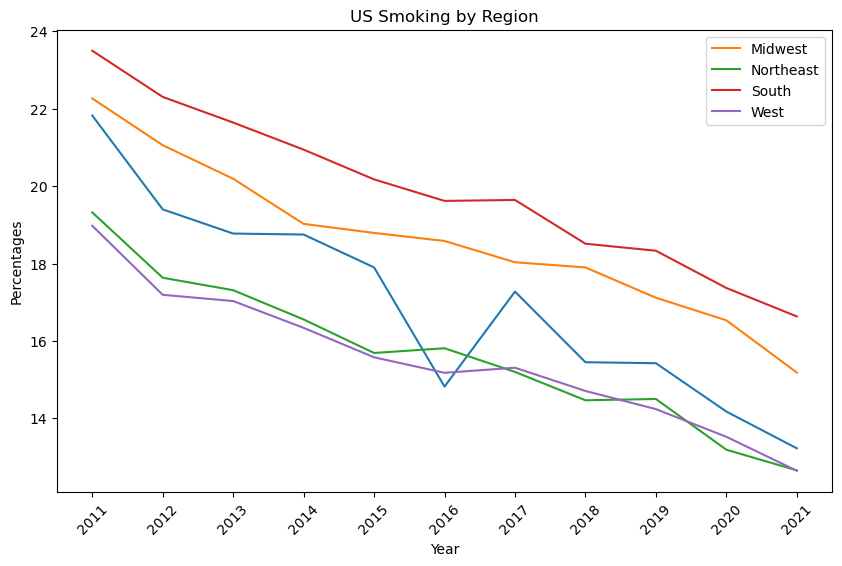

In [54]:
#Making groups for the loop by Region
groups = smoking_region.groupby('Region')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
for name, group in groups:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Smoking by Region')

#Adjusting the ticks on the x axis
xticks = list(smoking_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)


# Show the legend
ax.legend()

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot.png')

In [36]:
#getting the average rate of diabetes by year and region
diabetes_region = diabetes_df.groupby(["Year","Region"]).mean().reset_index()
diabetes_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,,10.500000,9.550000,11.600000
1,2011,Midwest,9.133333,8.391667,9.933333
2,2011,Northeast,8.933333,8.244444,9.688889
3,2011,South,10.975000,10.100000,11.912500
4,2011,West,8.623077,7.776923,9.553846
5,2012,,10.975000,9.925000,12.125000
6,2012,Midwest,9.366667,8.583333,10.183333
7,2012,Northeast,9.166667,8.455556,9.977778
8,2012,South,11.231250,10.387500,12.131250
9,2012,West,8.653846,7.823077,9.546154


In [37]:
#Replace empty string values with NaN
diabetes_region['Region'] = diabetes_region['Region'].replace('', np.nan)

# Drop rows with NaN values
diabetes_region = diabetes_region.dropna()

diabetes_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
1,2011,Midwest,9.133333,8.391667,9.933333
2,2011,Northeast,8.933333,8.244444,9.688889
3,2011,South,10.975000,10.100000,11.912500
4,2011,West,8.623077,7.776923,9.553846
6,2012,Midwest,9.366667,8.583333,10.183333
7,2012,Northeast,9.166667,8.455556,9.977778
8,2012,South,11.231250,10.387500,12.131250
9,2012,West,8.653846,7.823077,9.546154
11,2013,Midwest,9.416667,8.650000,10.216667
12,2013,Northeast,9.177778,8.433333,9.988889


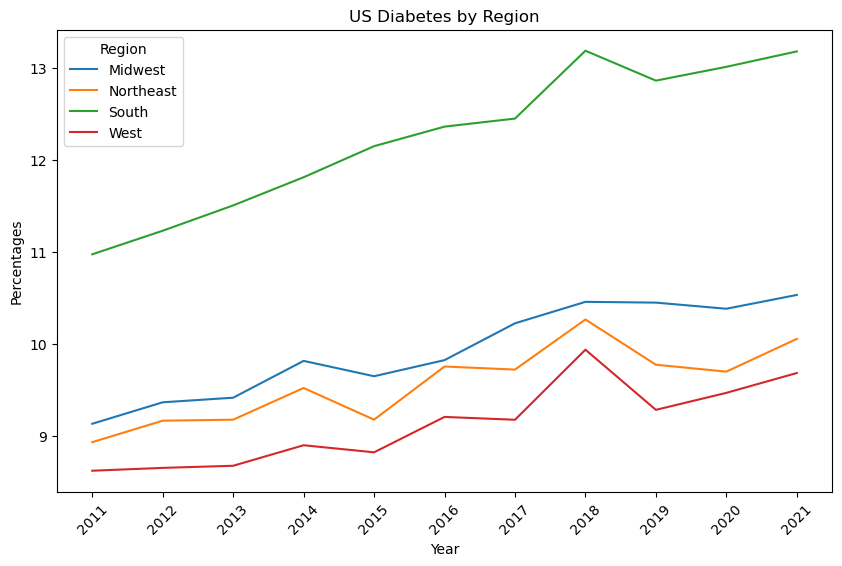

In [55]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups2 = diabetes_region.groupby('Region')
for name, group in groups2:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Diabetes by Region')

xticks = list(diabetes_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Region')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot2.png')

In [39]:
#Getting the average by year and region for obesity
obesity_region = obesity_df.groupby(["Year","Region"]).mean().reset_index()
obesity_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,,26.300000,24.550000,28.100000
1,2011,Midwest,28.783333,27.391667,30.225000
2,2011,Northeast,25.422222,24.166667,26.733333
3,2011,South,30.343750,28.800000,31.937500
4,2011,West,24.907692,23.453846,26.469231
5,2012,,26.750000,25.000000,28.725000
6,2012,Midwest,29.358333,27.975000,30.775000
7,2012,Northeast,25.644444,24.400000,26.933333
8,2012,South,30.737500,29.275000,32.237500
9,2012,West,25.246154,23.800000,26.723077


In [40]:
#Replace empty string values with NaN
obesity_region['Region'] = obesity_region['Region'].replace('', np.nan)

# Drop rows with NaN values
obesity_region = obesity_region.dropna()

obesity_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
1,2011,Midwest,28.783333,27.391667,30.225000
2,2011,Northeast,25.422222,24.166667,26.733333
3,2011,South,30.343750,28.800000,31.937500
4,2011,West,24.907692,23.453846,26.469231
6,2012,Midwest,29.358333,27.975000,30.775000
7,2012,Northeast,25.644444,24.400000,26.933333
8,2012,South,30.737500,29.275000,32.237500
9,2012,West,25.246154,23.800000,26.723077
11,2013,Midwest,30.050000,28.650000,31.450000
12,2013,Northeast,26.422222,25.133333,27.766667


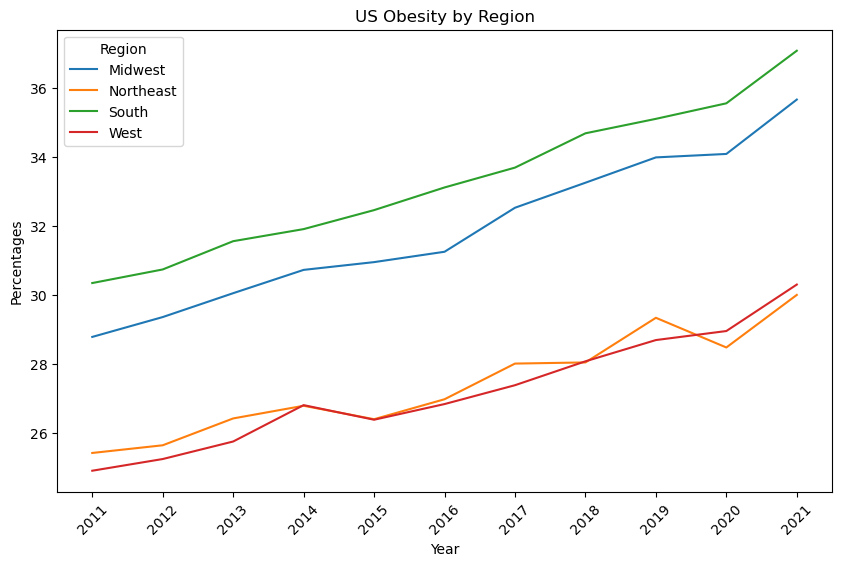

In [56]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups3 = obesity_region.groupby('Region')
for name, group in groups3:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Obesity by Region')

xticks = list(obesity_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Region')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot3.png')

In [42]:
#Adding in the regions to the original dataframe by making a loop
regions = {
    'Northeast': ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD'],
    'South': ['VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK'],
    'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# create a new column in your dataframe called 'State Region'
state_year_results['Region'] = ''

# loop through each state in your dataframe and assign its region to the new column
for state in state_year_results['State'].unique():
    for region, states in regions.items():
        if state in states:
            state_year_results.loc[state_year_results['State'] == state, 'Region'] = region
            break
            
state_year_results

,State,Year,Mean_Data_Value,Region
0,AK,1999,1076.709524,West
1,AK,2000,1164.495238,West
2,AK,2001,1058.209524,West
3,AK,2002,948.971429,West
4,AK,2003,1058.366667,West
...,...,...,...,...
1066,WY,2015,1115.413043,West
1067,WY,2016,1107.908696,West
1068,WY,2017,1091.300000,West
1069,WY,2018,1090.778261,West


In [43]:
#getting the average data value for each region
heart_study_region = state_year_results.groupby(["Year","Region"]).sum().reset_index()

#Replace empty string values with NaN
heart_study_region['Region'] = heart_study_region['Region'].replace('', np.nan)


# Drop rows with NaN values
heart_study_region = heart_study_region.dropna()

heart_study_region

,Year,Region,Mean_Data_Value
1,1999,Midwest,21677.509482
2,1999,Northeast,20649.774340
3,1999,South,29983.890492
4,1999,West,19941.521441
6,2000,Midwest,20882.039217
...,...,...,...
99,2018,West,13347.685014
101,2019,Midwest,14148.920201
102,2019,Northeast,12414.125774
103,2019,South,19462.636581


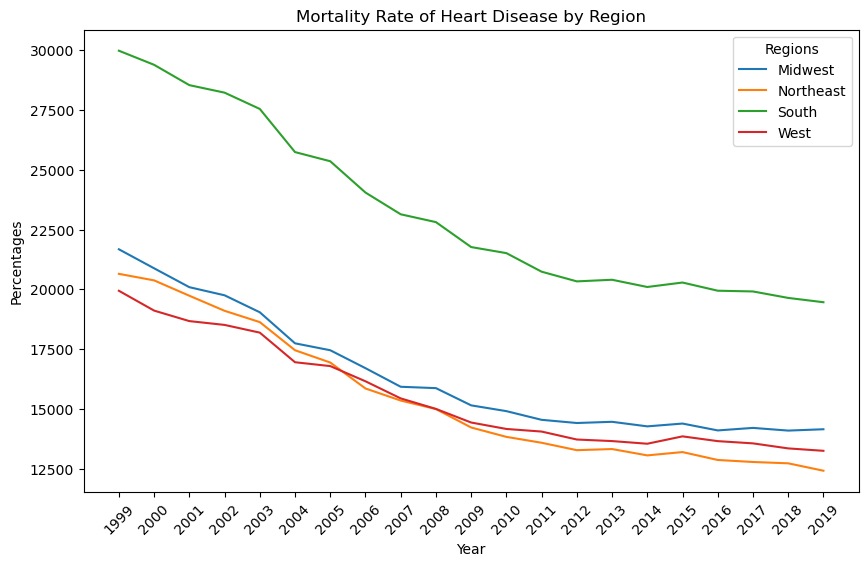

In [57]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups4 = heart_study_region.groupby('Region')
for name, group in groups4:
    ax.plot(group['Year'], group['Mean_Data_Value'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('Mortality Rate of Heart Disease by Region')

xticks = list(heart_study_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Regions')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot4.png')

In [58]:
#making a filtered dataframe with all the topics to then get the yearly average for each for the US
filtered_df = chronic_df.loc[((chronic_df["Topic"] == "Diabetes") &
                              (chronic_df["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall")) |
                             ((chronic_df["Topic"] == "Tobacco") &
                              (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall")) |
                             ((chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                              (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall"))]

filtered_df

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation,Region
529474,2019,AK,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,17.4,17.4,15.3,19.8,Overall,POINT (-147.72205903599973 64.84507995700051),West
530032,2014,AK,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,19.9,19.9,18.2,21.6,Overall,POINT (-147.72205903599973 64.84507995700051),West
530070,2012,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,25.7,25.7,23.9,27.5,Overall,POINT (-147.72205903599973 64.84507995700051),West
530100,2011,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,27.4,27.4,25.3,29.7,Overall,POINT (-147.72205903599973 64.84507995700051),West
530319,2019,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,%,Crude Prevalence,7.3,7.3,6.2,8.5,Overall,POINT (-147.72205903599973 64.84507995700051),West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183958,2020,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,%,Crude Prevalence,8.5,8.5,7.6,9.6,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184022,2018,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.8,18.8,17.3,20.4,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184707,2019,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.4,18.4,16.7,20.2,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184823,2017,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.7,18.7,17.2,20.3,Overall,POINT (-108.10983035299967 43.23554134300048),West


In [59]:
#Averaging each datavalue to get it ready to plot
topics_us = filtered_df.groupby(["Year","Question"]).mean().reset_index()
topics_us

,Year,Question,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,Current smoking among adults aged >= 18 years,21.316667,19.914815,22.790741
1,2011,Obesity among adults aged >= 18 years,27.568519,26.112963,29.088889
2,2011,Prevalence of diagnosed diabetes among adults ...,9.624074,8.811111,10.511111
3,2012,Current smoking among adults aged >= 18 years,19.803704,18.479630,21.170370
4,2012,Obesity among adults aged >= 18 years,27.964815,26.538889,29.440741
5,2012,Prevalence of diagnosed diabetes among adults ...,9.833333,9.012963,10.716667
6,2013,Current smoking among adults aged >= 18 years,19.275926,17.970370,20.657407
7,2013,Obesity among adults aged >= 18 years,28.614815,27.135185,30.107407
8,2013,Prevalence of diagnosed diabetes among adults ...,9.979630,9.135185,10.896296
9,2014,Current smoking among adults aged >= 18 years,18.514815,17.209259,19.912963


In [60]:
us_year_results = heart_study_region.groupby('Year').mean().reset_index()

us_year_results

,Year,Mean_Data_Value
0,1999,23063.173939
1,2000,22441.299002
2,2001,21761.019011
3,2002,21400.064270
4,2003,20853.281226
5,2004,19473.438005
6,2005,19136.445315
7,2006,18191.336389
8,2007,17464.289284
9,2008,17168.977393


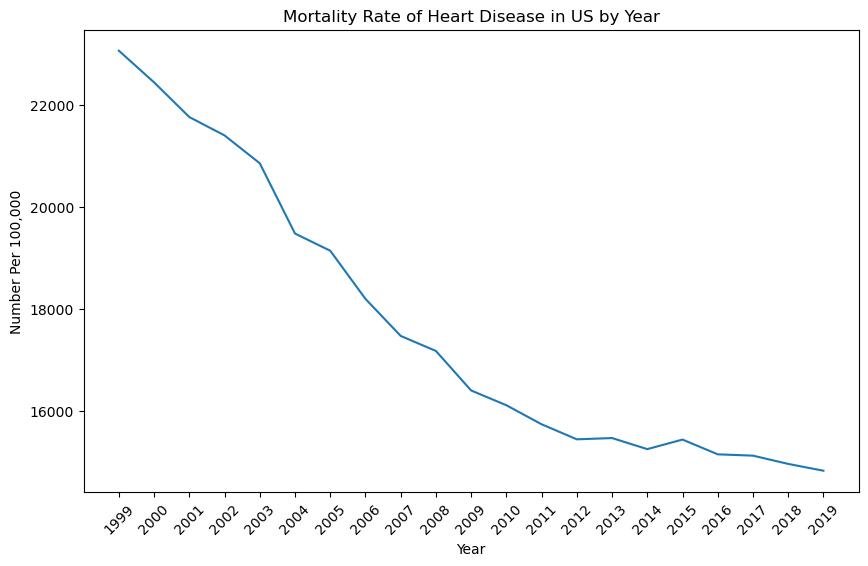

In [62]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(us_year_results['Year'], us_year_results['Mean_Data_Value'])

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number Per 100,000')
ax.set_title('Mortality Rate of Heart Disease in US by Year')

ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot5.png')

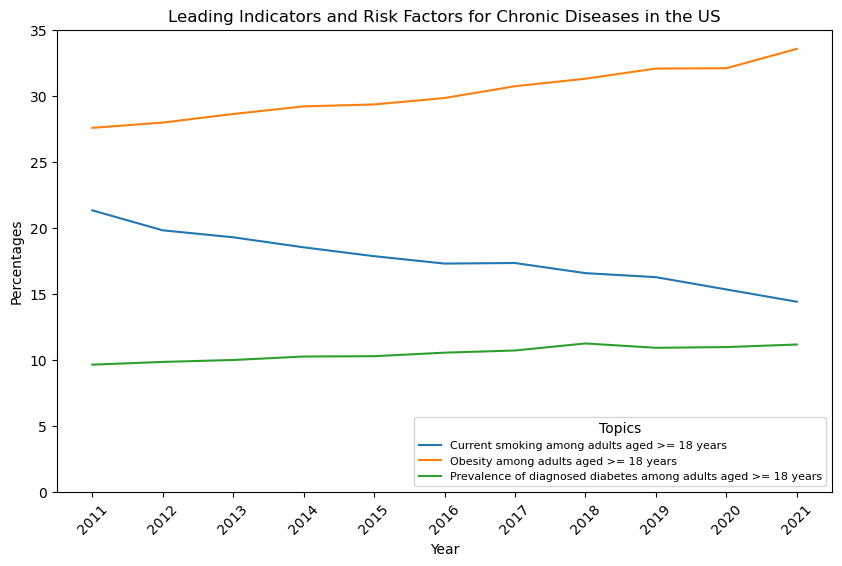

In [63]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups5 = topics_us.groupby('Question')
for name, group in groups5:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('Leading Indicators and Risk Factors for Chronic Diseases in the US')

xticks = list(topics_us['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

# Show the legend
ax.legend(title='Topics',loc='lower right', fontsize=8)

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/my_plot6.png')